Let's start here! If you can directly link to an image relevant to your notebook, such as [canonical logos](https://github.com/numpy/numpy/blob/main/doc/source/_static/numpylogo.svg), do so here at the top of your notebook. You can do this with Markdown syntax,

> `![<image title>](http://link.com/to/image.png "image alt text")`

or edit this cell to see raw HTML `img` demonstration. This is preferred if you need to shrink your embedded image. **Either way be sure to include `alt` text for any embedded images to make your content more accessible.**

<img src="images/ProjectPythia_Logo_Final-01-Blue.svg" width=250 alt="Project Pythia Logo"></img>

# Project Pythia Notebook Template

Next, title your notebook appropriately with a top-level Markdown header, `#`. Do not use this level header anywhere else in the notebook. Our book build process will use this title in the navbar, table of contents, etc. Keep it short, keep it descriptive. Follow this with a `---` cell to visually distinguish the transition to the prerequisites section.

---

## Overview
If you have an introductory paragraph, lead with it here! Keep it short and tied to your material, then be sure to continue into the required list of topics below,

1. This is a numbered list of the specific topics
1. These should map approximately to your main sections of content
1. Or each second-level, `##`, header in your notebook
1. Keep the size and scope of your notebook in check
1. And be sure to let the reader know up front the important concepts they'll be leaving with

## Prerequisites
This section was inspired by [this template](https://github.com/alan-turing-institute/the-turing-way/blob/master/book/templates/chapter-template/chapter-landing-page.md) of the wonderful [The Turing Way](https://the-turing-way.netlify.app) Jupyter Book.

Following your overview, tell your reader what concepts, packages, or other background information they'll **need** before learning your material. Tie this explicitly with links to other pages here in Foundations or to relevant external resources. Remove this body text, then populate the Markdown table, denoted in this cell with `|` vertical brackets, below, and fill out the information following. In this table, lay out prerequisite concepts by explicitly linking to other Foundations material or external resources, or describe generally helpful concepts.

Label the importance of each concept explicitly as **helpful/necessary**.

| Concepts | Importance | Notes |
| --- | --- | --- |
| [Intro to Cartopy](https://foundations.projectpythia.org/core/cartopy/cartopy.html) | Necessary | |
| [Understanding of NetCDF](https://foundations.projectpythia.org/core/data-formats/netcdf-cf.html) | Helpful | Familiarity with metadata structure |
| Project management | Helpful | |

- **Time to learn**: estimate in minutes. For a rough idea, use 5 mins per subsection, 10 if longer; add these up for a total. Safer to round up and overestimate.
- **System requirements**:
    - Populate with any system, version, or non-Python software requirements if necessary
    - Otherwise use the concepts table above and the Imports section below to describe required packages as necessary
    - If no extra requirements, remove the **System requirements** point altogether

---

## Imports
Begin your body of content with another `---` divider before continuing into this section, then remove this body text and populate the following code cell with all necessary Python imports **up-front**:

In [1]:
import act
from herbie import Herbie
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import xarray as xr
import metpy.calc as mpcalc
from metpy.units import units

## Your first content section

This is where you begin your first section of material, loosely tied to your objectives stated up front. Tie together your notebook as a narrative, with interspersed Markdown text, images, and more as necessary,

In [67]:
yr=input('Year (yyyy):')
m=input('Month (mm):')
dd=input('Day (dd):')
H=[]
date=(f'{yr}-{m}-{dd}')
for a in range(0, 25):
    H.append(Herbie(f"{yr}-{m}-{dd}",  # model run date
        model="hrrr",  # model name
        product="prs",
        fxx=a,  # forecast lead time
              ))

Year (yyyy): 2024
Month (mm): 04
Day (dd): 29


✅ Found ┊ model=hrrr ┊ product=prs ┊ 2024-Apr-29 00:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=prs ┊ 2024-Apr-29 00:00 UTC F01 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=prs ┊ 2024-Apr-29 00:00 UTC F02 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=prs ┊ 2024-Apr-29 00:00 UTC F03 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=prs ┊ 2024-Apr-29 00:00 UTC F04 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=prs ┊ 2024-Apr-29 00:00 UTC F05 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=prs ┊ 2024-Apr-29 00:00 UTC F06 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=prs ┊ 2024-Apr-29 00:00 UTC F07 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=prs ┊ 2024-Apr-29 00:00 UTC F08 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=prs ┊ 2024-Apr-29 00:00 UTC F09 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=hrrr ┊ product=prs ┊ 2024-Apr-29 00:00 UTC F10 ┊ GRIB2 @ aws ┊ IDX @ aws
✅ Found ┊ model=hrrr 

In [78]:
level = input(f'Enter level (surface, 850 mb, 500 mb, etc.):')
ds=[]
for a in range (0, 25):
    ds.append(H[a].xarray(f":{level}:", remove_grib=False))
    if level == str('surface'):
        ds.append(ds[a][0])

Enter level (surface, 850 mb, 500 mb, etc.): 1000 mb


### A content subsection
Divide and conquer your objectives with Markdown subsections, which will populate the helpful navbar in Jupyter Lab and here on the Jupyter Book!

In [79]:
# I want to find the speed at a certain lat/lon point.
lat = [41.4456, 42.03, 41.2453]
lon = [-71.4357, -70.049, -70.105]
point_ds=[]
for a in range(0, 25):
    ds[a]['longitude'] = (ds[a]['longitude'] + 180) % 360 - 180
    for b in range(0, 3):
        # First, find the index of the grid point nearest a specific lat/lon.   
        abslat = np.abs(ds[a].latitude-lat[b])
        abslon = np.abs(ds[a].longitude-lon[b])
        c = np.maximum(abslon, abslat)
        ([yloc], [xloc]) = np.where(c == np.min(c))
        # Now I can use that index location to get the values at the x/y diminsion
        point_ds.append(ds[a].sel(x=xloc, y=yloc))

In [80]:
rhod_spd=[]
caco_spd=[]
sodar_spd=[]
rhod_dir=[]
caco_dir=[]
sodar_dir=[]
times=[]
for d in range(0, 75, 3):
    rhod_spd.append((mpcalc.wind_speed(point_ds[d].u.values * units.meter/units.second, point_ds[d].v.values * units.meter/units.second)).m)
    caco_spd.append((mpcalc.wind_speed(point_ds[d+1].u.values * units.meter/units.second, point_ds[d+1].v.values * units.meter/units.second)).m)
    sodar_spd.append((mpcalc.wind_speed(point_ds[d+2].u.values * units.meter/units.second, point_ds[d+2].v.values * units.meter/units.second)).m)
    rhod_dir.append((mpcalc.wind_direction(point_ds[d].u.values * units.meter/units.second, point_ds[d].v.values * units.meter/units.second)).m)
    caco_dir.append((mpcalc.wind_direction(point_ds[d+1].u.values * units.meter/units.second, point_ds[d+1].v.values * units.meter/units.second)).m)
    sodar_dir.append((mpcalc.wind_direction(point_ds[d+2].u.values * units.meter/units.second, point_ds[d+2].v.values * units.meter/units.second)).m)
    times.append(point_ds[d].valid_time.values)

### Another content subsection
Keep up the good work! A note, *try to avoid using code comments as narrative*, and instead let them only exist as brief clarifications where necessary.

Text(0.5, 0, 'Time')

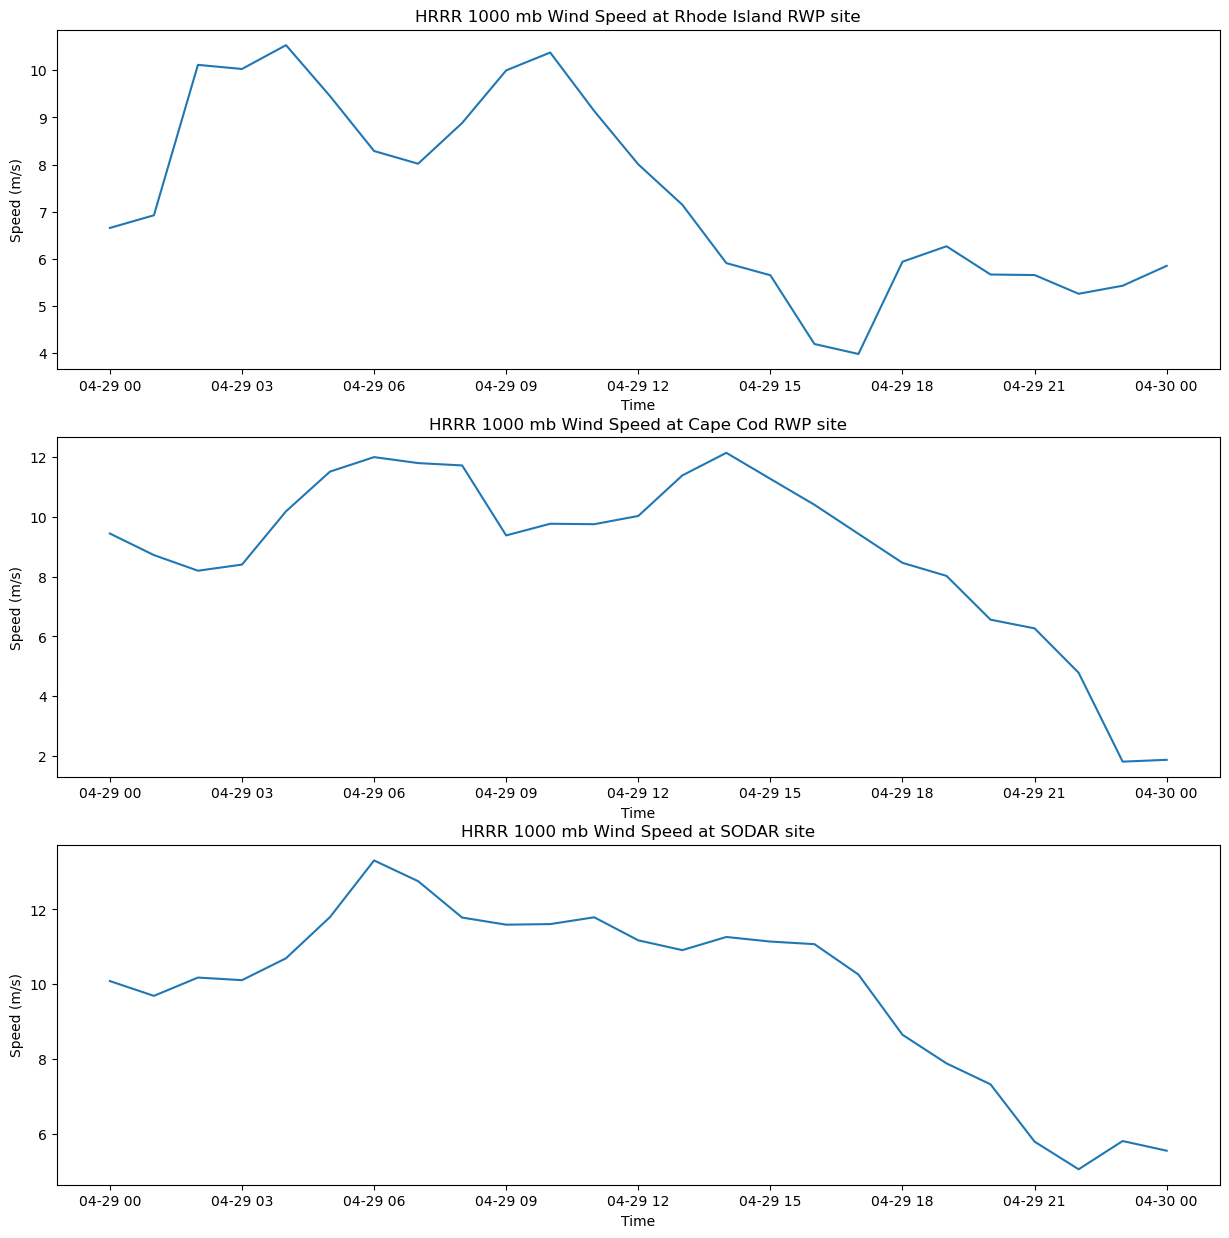

In [81]:
plt.figure(figsize=(15, 15))
ax = plt.subplot(311)
ax.plot(times, rhod_spd)
ax.set_title(f'HRRR {level} Wind Speed at Rhode Island RWP site')
ax.set_ylabel('Speed (m/s)')
ax.set_xlabel('Time')
ax = plt.subplot(312)
ax.plot(times, caco_spd)
ax.set_title(f'HRRR {level} Wind Speed at Cape Cod RWP site')
ax.set_ylabel('Speed (m/s)')
ax.set_xlabel('Time')
ax = plt.subplot(313)
ax.plot(times, sodar_spd)
ax.set_title(f'HRRR {level} Wind Speed at SODAR site')
ax.set_ylabel('Speed (m/s)')
ax.set_xlabel('Time')

Text(0.5, 0, 'Time')

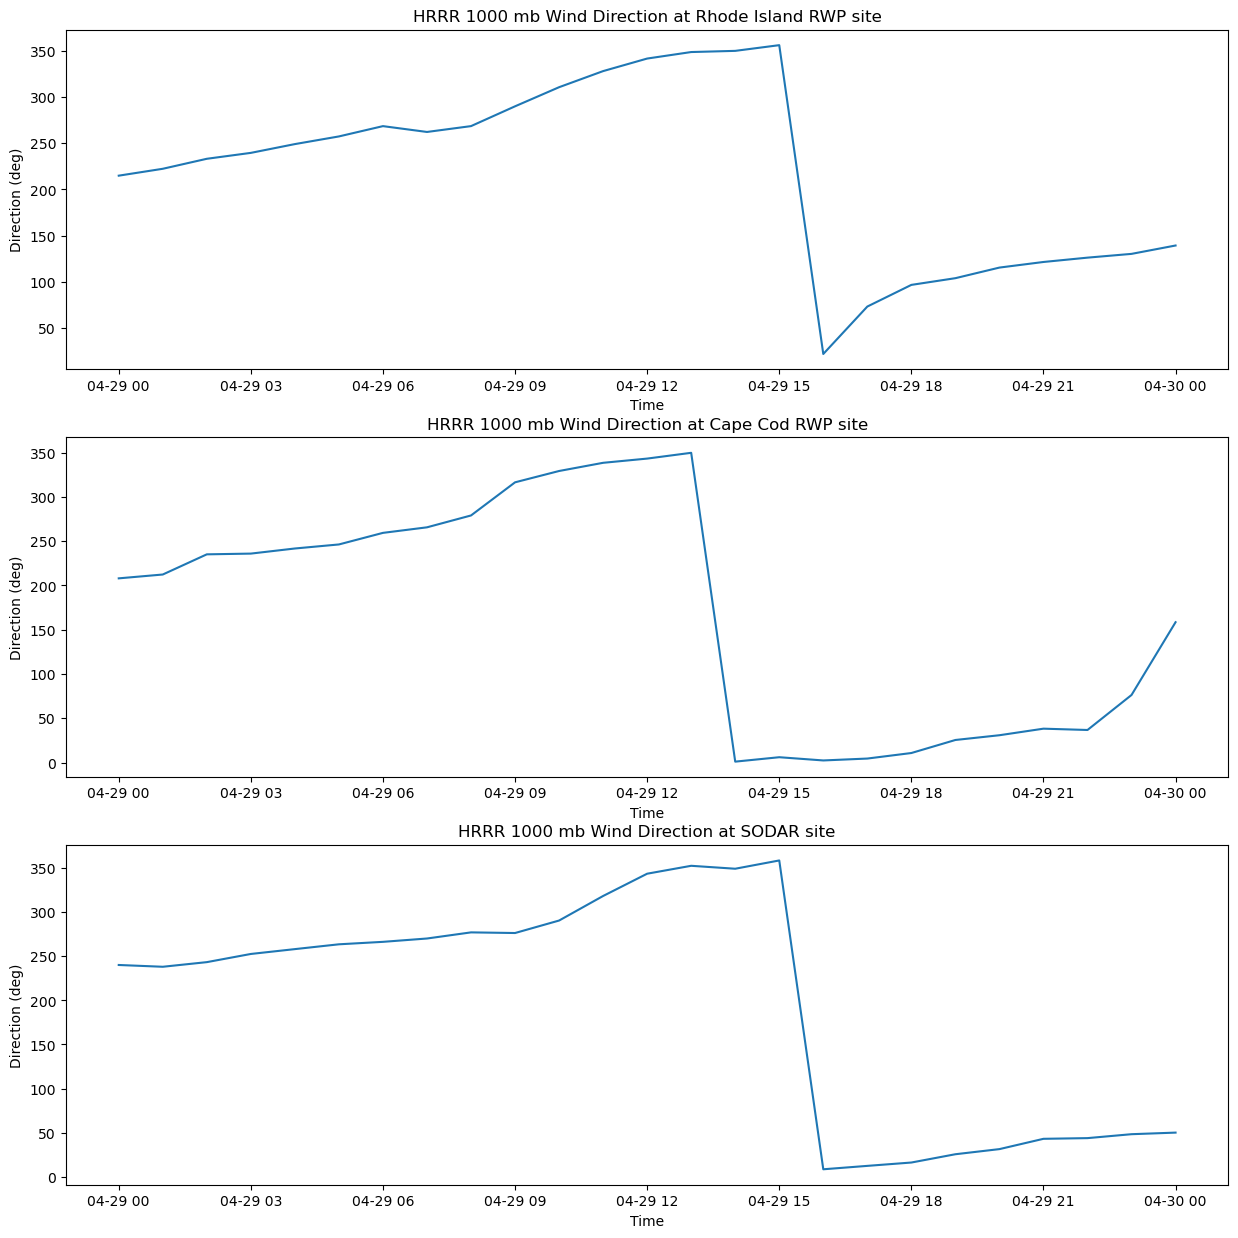

In [82]:
plt.figure(figsize=(15, 15))
ax = plt.subplot(311)
ax.plot(times, rhod_dir)
ax.set_title(f'HRRR {level} Wind Direction at Rhode Island RWP site')
ax.set_ylabel('Direction (deg)')
ax.set_xlabel('Time')
ax = plt.subplot(312)
ax.plot(times, caco_dir)
ax.set_title(f'HRRR {level} Wind Direction at Cape Cod RWP site')
ax.set_ylabel('Direction (deg)')
ax.set_xlabel('Time')
ax = plt.subplot(313)
ax.plot(times, sodar_dir)
ax.set_title(f'HRRR {level} Wind Direction at SODAR site')
ax.set_ylabel('Direction (deg)')
ax.set_xlabel('Time')

## Your second content section
Here we can move on to our second objective, and we can demonstrate

In [83]:
#Read in the Rhode Island Data.
ds1, ds2 = act.io.read_psl_wind_profiler(f"../data/rhod-rwp-raw/rhod.rwp.z01.00.{yr}{m}{dd}.000000.winds.cns", 
                                         transpose=False)
#Read in the Cape Cod data.
ds3, ds4 = act.io.read_psl_wind_profiler(f"../data/caco-rwp-raw/caco.rwp.z01.00.{yr}{m}{dd}.000000.winds.cns", 
                                         transpose=False)
# Call the read_sodar function.
# More information on the sodar can be found here:
# https://www.scintec.com/products/flat-array-sodar-mfas/
ds5 = act.io.read_mfas_sodar(f'../data/nant-sodar-raw/nant.sodar.z01.00.{yr}{m}{dd}.000000.mnd')

C:\Users\nickm\miniconda3\envs\forecasting-dev\Lib\site-packages\xarray\core\dataset.py:4743: UserWarning: No index created for dimension time because variable time is not a coordinate. To create an index for time, please first call `.set_coords('time')` on this object.
  warnings.warn(
C:\Users\nickm\miniconda3\envs\forecasting-dev\Lib\site-packages\xarray\core\dataset.py:4743: UserWarning: No index created for dimension time because variable time is not a coordinate. To create an index for time, please first call `.set_coords('time')` on this object.
  warnings.warn(


### Subsection to the second section

#### a quick demonstration

##### of further and further

###### header levels

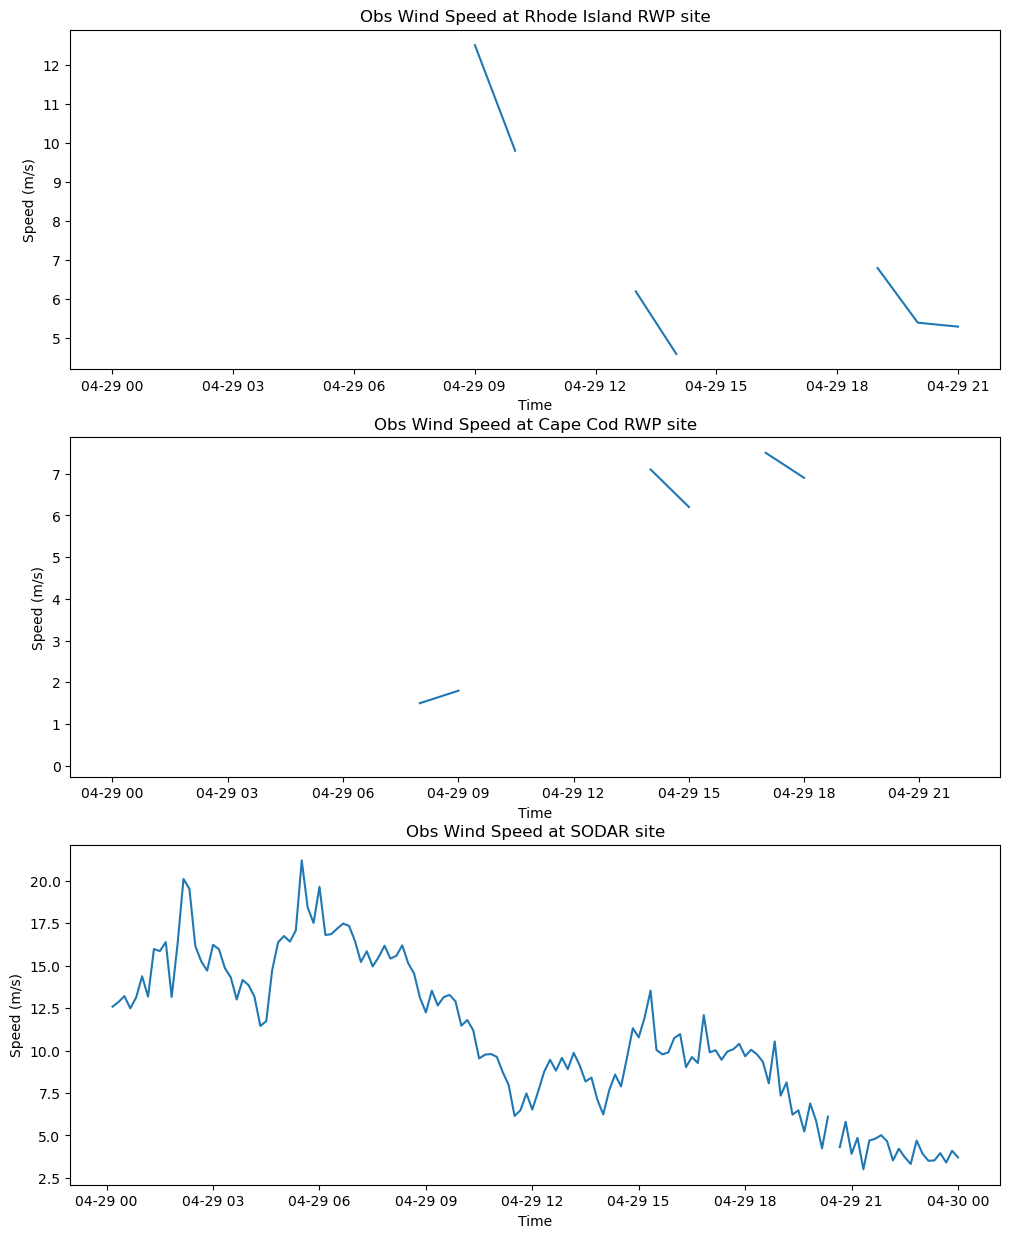

In [84]:
ds1_hub_height=ds1.sel(HT=0.103)
ds3_hub_height=ds3.sel(HT=0.137)
ds5_hub_height=ds5.sel(height = 120)
plt.figure(1, figsize=(12, 15))
ax=plt.subplot(311)
ax.plot(ds1_hub_height.time, ds1_hub_height.SPD)
ax.set_title(f'Obs Wind Speed at Rhode Island RWP site')
ax.set_ylabel('Speed (m/s)')
ax.set_xlabel('Time')
ax = plt.subplot(312)
ax.plot(ds3_hub_height.time, ds3_hub_height.SPD)
ax.set_title(f'Obs Wind Speed at Cape Cod RWP site')
ax.set_ylabel('Speed (m/s)')
ax.set_xlabel('Time')
ax = plt.subplot(313)
ax. plot(ds5_hub_height.time, ds5_hub_height.speed)
ax.set_title(f'Obs Wind Speed at SODAR site')
ax.set_ylabel('Speed (m/s)')
ax.set_xlabel('Time')
plt.savefig(f'../../../Downloads/{yr}{m}{dd}_Obsspd.png', bbox_inches='tight', dpi=150)

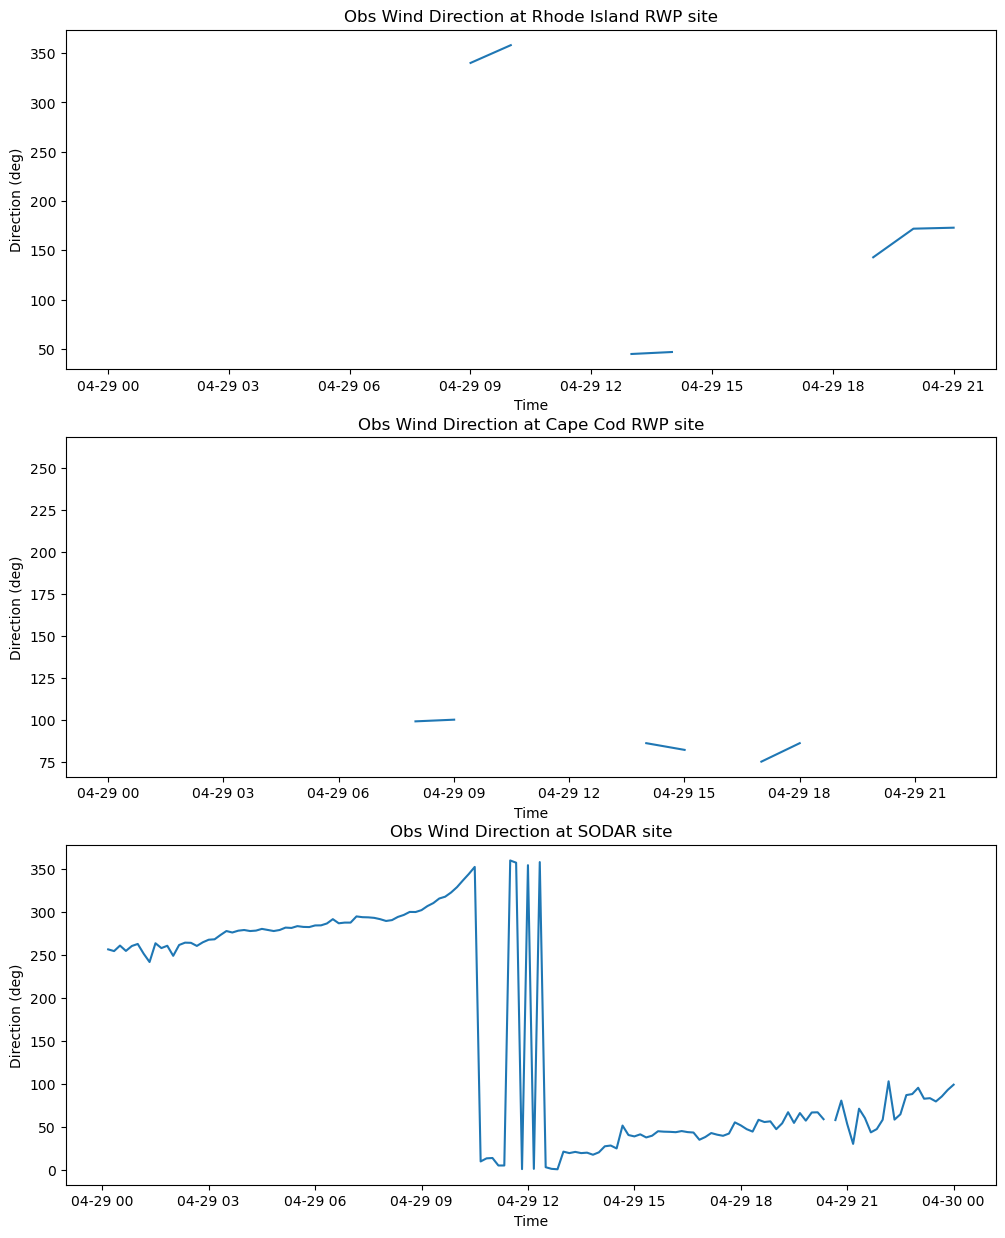

In [85]:
plt.figure(1, figsize=(12, 15))
ax=plt.subplot(311)
ax.plot(ds1_hub_height.time, ds1_hub_height.DIR)
ax.set_title(f'Obs Wind Direction at Rhode Island RWP site')
ax.set_ylabel('Direction (deg)')
ax.set_xlabel('Time')
ax = plt.subplot(312)
ax.plot(ds3_hub_height.time, ds3_hub_height.DIR)
ax.set_title(f'Obs Wind Direction at Cape Cod RWP site')
ax.set_ylabel('Direction (deg)')
ax.set_xlabel('Time')
ax = plt.subplot(313)
ax.plot(ds5_hub_height.time, ds5_hub_height.dir)
ax.set_title(f'Obs Wind Direction at SODAR site')
ax.set_ylabel('Direction (deg)')
ax.set_xlabel('Time')
plt.savefig(f'../../../Downloads/{yr}{m}{dd}_Obsdir.png', bbox_inches='tight', dpi=150)

as well $m = a * t / h$ text! Similarly, you have access to other $\LaTeX$ equation [**functionality**](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Typesetting%20Equations.html) via MathJax (demo below from link),

\begin{align}
\dot{x} & = \sigma(y-x) \\
\dot{y} & = \rho x - y - xz \\
\dot{z} & = -\beta z + xy
\end{align}

Check out [**any number of helpful Markdown resources**](https://www.markdownguide.org/basic-syntax/) for further customizing your notebooks and the [**Jupyter docs**](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html) for Jupyter-specific formatting information. Don't hesitate to ask questions if you have problems getting it to look *just right*.

## Last Section

If you're comfortable, and as we briefly used for our embedded logo up top, you can embed raw html into Jupyter Markdown cells (edit to see):

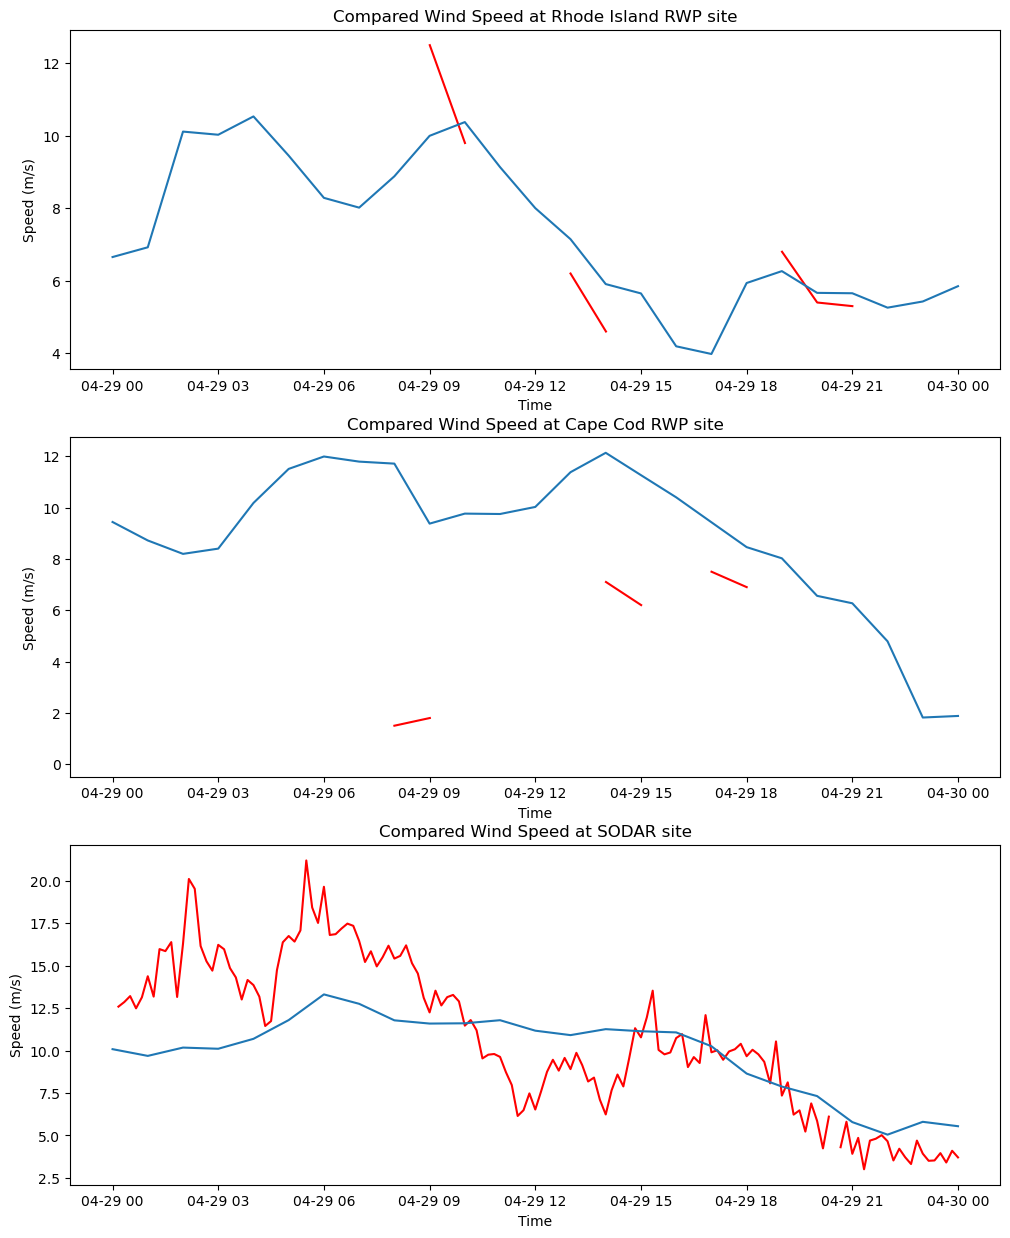

In [86]:
plt.figure(1, figsize=(12,15))
ax=plt.subplot(311)
ax.plot(ds1_hub_height.time, ds1_hub_height.SPD, color='red')
ax.plot(times, rhod_spd)
ax.set_title(f'Compared Wind Speed at Rhode Island RWP site')
ax.set_ylabel('Speed (m/s)')
ax.set_xlabel('Time')
ax=plt.subplot(312)
ax.plot(ds3_hub_height.time, ds3_hub_height.SPD, color='red')
ax.plot(times, caco_spd)
ax.set_title(f'Compared Wind Speed at Cape Cod RWP site')
ax.set_ylabel('Speed (m/s)')
ax.set_xlabel('Time')
ax=plt.subplot(313)
ax.plot(ds5_hub_height.time, ds5_hub_height.speed, color='red')
ax.plot(times, sodar_spd)
ax.set_title(f'Compared Wind Speed at SODAR site')
ax.set_ylabel('Speed (m/s)')
ax.set_xlabel('Time')
plt.savefig(f'../../../Downloads/{yr}{m}{dd}_Comparisonspd.png', bbox_inches='tight', dpi=150)

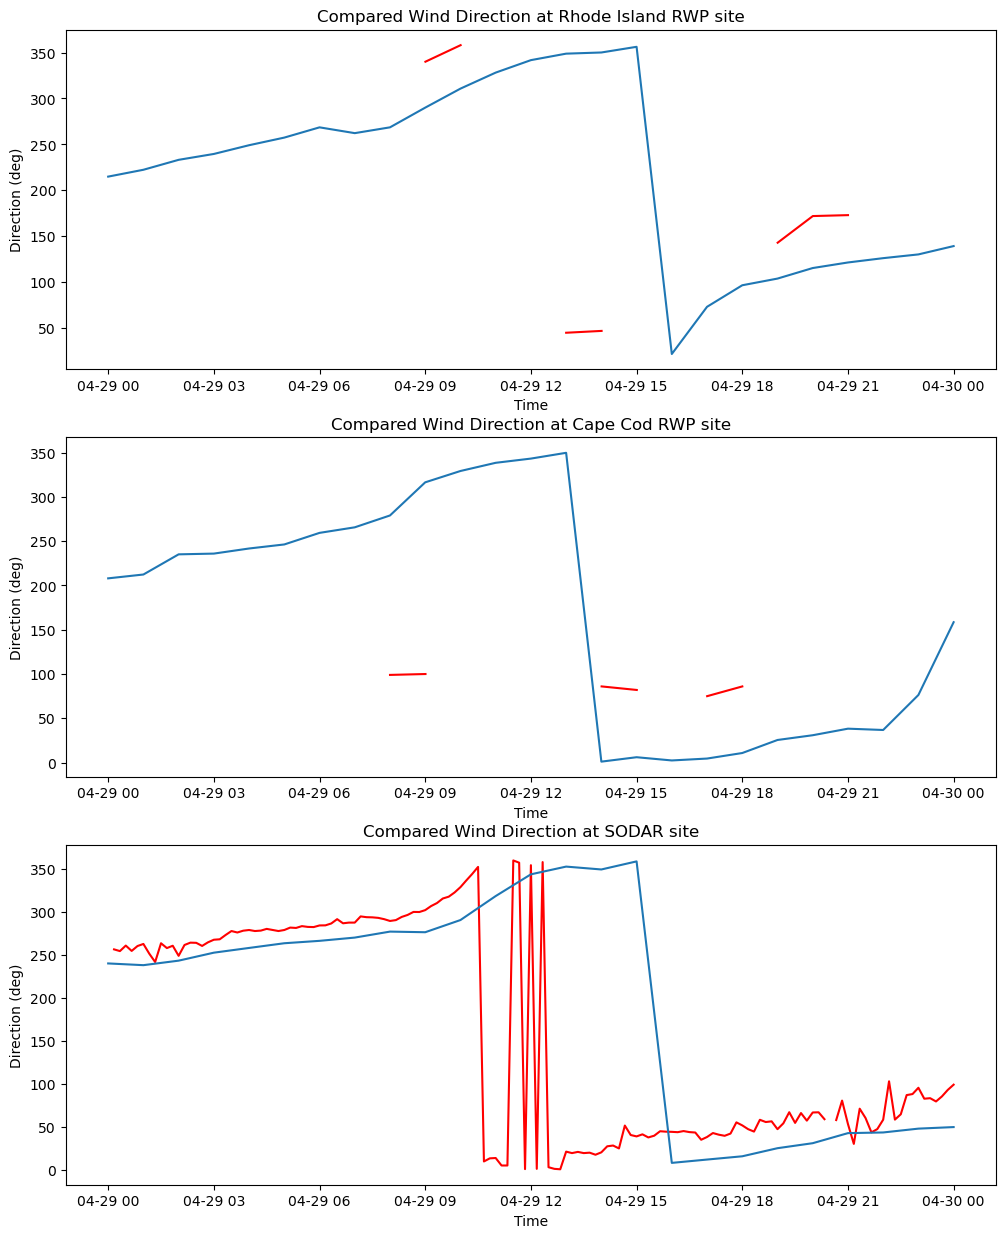

In [87]:
plt.figure(1, figsize=(12,15))
ax=plt.subplot(311)
ax.plot(ds1_hub_height.time, ds1_hub_height.DIR, color='red')
ax.plot(times, rhod_dir)
ax.set_title(f'Compared Wind Direction at Rhode Island RWP site')
ax.set_ylabel('Direction (deg)')
ax.set_xlabel('Time')
ax=plt.subplot(312)
ax.plot(ds3_hub_height.time, ds3_hub_height.DIR, color='red')
ax.plot(times, caco_dir)
ax.set_title(f'Compared Wind Direction at Cape Cod RWP site')
ax.set_ylabel('Direction (deg)')
ax.set_xlabel('Time')
ax=plt.subplot(313)
ax.plot(ds5_hub_height.time, ds5_hub_height.dir, color='red')
ax.plot(times, sodar_dir)
ax.set_title(f'Compared Wind Direction at SODAR site')
ax.set_ylabel('Direction (deg)')
ax.set_xlabel('Time')
plt.savefig(f'../../../Downloads/{yr}{m}{dd}_Comparisondir.png', bbox_inches='tight', dpi=150)

<div class="admonition alert alert-info">
    <p class="admonition-title" style="font-weight:bold">Info</p>
    Your relevant information here!
</div>

Feel free to copy this around and edit or play around with yourself. Some other `admonitions` you can put in:

<div class="admonition alert alert-success">
    <p class="admonition-title" style="font-weight:bold">Success</p>
    We got this done after all!
</div>

<div class="admonition alert alert-warning">
    <p class="admonition-title" style="font-weight:bold">Warning</p>
    Be careful!
</div>

<div class="admonition alert alert-danger">
    <p class="admonition-title" style="font-weight:bold">Danger</p>
    Scary stuff be here.
</div>

We also suggest checking out Jupyter Book's [brief demonstration](https://jupyterbook.org/content/metadata.html#jupyter-cell-tags) on adding cell tags to your cells in Jupyter Notebook, Lab, or manually. Using these cell tags can allow you to [customize](https://jupyterbook.org/interactive/hiding.html) how your code content is displayed and even [demonstrate errors](https://jupyterbook.org/content/execute.html#dealing-with-code-that-raises-errors) without altogether crashing our loyal army of machines!

---

## Summary
Add one final `---` marking the end of your body of content, and then conclude with a brief single paragraph summarizing at a high level the key pieces that were learned and how they tied to your objectives. Look to reiterate what the most important takeaways were.

### What's next?
Let Jupyter book tie this to the next (sequential) piece of content that people could move on to down below and in the sidebar. However, if this page uniquely enables your reader to tackle other nonsequential concepts throughout this book, or even external content, link to it here!

## Resources and references
Finally, be rigorous in your citations and references as necessary. Give credit where credit is due. Also, feel free to link to relevant external material, further reading, documentation, etc. Then you're done! Give yourself a quick review, a high five, and send us a pull request. A few final notes:
 - `Kernel > Restart Kernel and Run All Cells...` to confirm that your notebook will cleanly run from start to finish
 - `Kernel > Restart Kernel and Clear All Outputs...` before committing your notebook, our machines will do the heavy lifting
 - Take credit! Provide author contact information if you'd like; if so, consider adding information here at the bottom of your notebook
 - Give credit! Attribute appropriate authorship for referenced code, information, images, etc.
 - Only include what you're legally allowed: **no copyright infringement or plagiarism**
 
Thank you for your contribution!